# Pisa 2012 Data Exploration
### by Gabriela Sikora

## Introduction
This notebook will be dedicated to exploring details of the PISA 2012 dataset. PISA, in particular, is a "survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school" (Udacity, 2019).

Within this datset we can find information for about 510,000 students. The PISA 2012 dataset includes information on mathematics, reading in the test language, and science.


Throughout the course of this notebook I will have these two questions in mind:

- Are there differences in achievement based on gender or parental education levels?
- Is there a relationship between the amount of time a student dedicates to learning and their score? 

## Preliminary Wrangling 
To begin, let's start off by assessing the dataset and cleaning any remaining issues.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read in the cleaned csv that was created in the wrangle_pisa notebook
pisa = pd.read_csv('pisa_df.csv')

In [3]:
# Set up variables for colors to be used in plotting
color1 = '#a7d7c5'
color2 = '#74b49b'
color3 = '#5c8d89'
color_male = '#ff8162' 
color_female = '#ffcd60'
color_gends = ['#ffcd60', '#ff8162']
color_gends_r = ['#ff8162', '#ffcd60']

### Assessing and Cleaning the Data

#### General

In [4]:
# How many rows and variables the dataset holds
pisa.shape

(15167, 19)

In [5]:
# What are the data types of the variables
pisa.dtypes

Country                                           object
Student ID                                         int64
Gender                                            object
Out-of-School Study Time - Homework              float64
Out-of-School Study Time - Guided Homework       float64
Out-of-School Study Time - Personal Tutor        float64
Out-of-School Study Time - Commercial Company    float64
Out-of-School Study Time - With Parent           float64
Learning Time - Mathematics                      float64
Learning Time - Test Language                    float64
Learning Time - Science                          float64
Average Math Score                               float64
Average Reading Score                            float64
Average Science Score                            float64
Average Total Score                              float64
Education - Father                                object
Education - Mother                                object
Out-of-School Study Time - Tota

In [6]:
# See 10 examples of data in the dataset 
pisa.sample(10)

Country  Student ID  Gender  \
1722      Switzerland        1011    Male   
11239          Mexico       28056  Female   
12238           Italy       17198    Male   
9987      Switzerland       10938  Female   
11790           Italy       11161    Male   
6526           Brazil       13425  Female   
13739           Italy       29003    Male   
1230   United Kingdom       11252    Male   
4545            Spain       12807    Male   
3660          Ireland        1201  Female   

       Out-of-School Study Time - Homework  \
1722                                   9.0   
11239                                  8.0   
12238                                 24.0   
9987                                   3.0   
11790                                  2.0   
6526                                   6.0   
13739                                  4.0   
1230                                   5.0   
4545                                   5.0   
3660                                  14.0   

       Out-of-School Study Time - Guided Homework  \
1722                                          0.0   
11239                                         2.0   
12238                                        20.0   
9987                                          0.0   
11790                                         1.0   
6526                                          2.0   
13739                                         0.0   
1230                                          0.0   
4545                                          0.0   
3660                                          0.0   

       Out-of-School Study Time - Personal Tutor  \
1722                                         0.0   
11239                                        0.0   
12238                                        1.0   
9987                                         0.0   
11790                                        1.0   
6526                                         0.0   
13739                                        0.0   
1230                                         0.0   
4545                                        10.0   
3660                                         0.0   

       Out-of-School Study Time - Commercial Company  \
1722                                             4.0   
11239                                            0.0   
12238                                            0.0   
9987                                             0.0   
11790                                            1.0   
6526                                             0.0   
13739                                            0.0   
1230                                             0.0   
4545                                             2.0   
3660                                             0.0   

       Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
1722                                      4.0                        180.0   
11239                                     2.0                        250.0   
12238                                    10.0                        180.0   
9987                                      1.0                        180.0   
11790                                     0.0                        240.0   
6526                                      0.0                        100.0   
13739                                     0.0                        360.0   
1230                                      0.0                        180.0   
4545                                     10.0                        200.0   
3660                                      1.0                        225.0   

       Learning Time - Test Language  Learning Time - Science  \
1722                           180.0                     90.0   
11239                          150.0                    150.0   
12238                          240.0                    120.0   
9987                           180.0                    180.0   
11790                          360.0                 

In [7]:
# Decriptive statistics for each numeric variable
pisa.describe()

Student ID  Out-of-School Study Time - Homework  \
count  15167.000000                         15167.000000   
mean   16988.039626                             6.673370   
std     9561.527074                             5.791363   
min        2.000000                             0.000000   
25%     9031.500000                             2.000000   
50%    17275.000000                             5.000000   
75%    25033.500000                             9.000000   
max    33806.000000                            30.000000   

       Out-of-School Study Time - Guided Homework  \
count                                15167.000000   
mean                                     1.608031   
std                                      2.485229   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      2.000000   
max                                     30.000000   

       Out-of-School Study Time - Personal Tutor  \
count                               15167.000000   
mean                                    0.825674   
std                                     1.946453   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                    30.000000   

       Out-of-School Study Time - Commercial Company  \
count                                   15167.000000   
mean                                        0.688271   
std                                         1.911433   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                        30.000000   

       Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
count                            15167.000000                 15167.000000   
mean                                 1.093624                   246.463374   
std                                  2.073632                    90.533247   
min                                  0.000000                     0.000000   
25%                                  0.000000                   200.000000   
50%                                  0.000000                   240.000000   
75%                                  1.000000                   285.000000   
max                                 30.000000                  1440.000000   

       Learning Time - Test Language  Learning Time - Science  \
count                   15167.000000             15167.000000   
mean                      242.097119               228.560823   
std                        94.357716               133.939948   
min                         0.000000                 0.000000   
25%                       200.000000               135.000000   
50%                       225.000000               200.000000   
75%                       275.000000               300.000000   
max                      1800.000000              1920.000000   

       Average Math Score  Average Reading Score  Average Science Score  \
count        15167.000000           15167.000000           15167.000000   
mean           503.980473             506.784609             508.320475   
std             90.423852              87.835595              88.778732   
min            199.104220             143.690300             144.479680   
25%            438.627520             447.627480             445.300260   
50%            503.201440             510.427600             509.175700   
75%            568.125880             569.683140             573.237600   
max            796.627180             790.138200             834.800440   

       Average Total Score  Out-of-School Study Tim

#### Parental Education

In [8]:
# The type and quantity of the educational levels for 'Education - Father'
pisa['Education - Father'].value_counts()

Short-cycle tertiary        6509
Bachelor’s or equivalent    5298
Upper secondary             1244
Post-secondary               900
Lower secondary              881
Primary                      232
Early childhood              103
Name: Education - Father, dtype: int64

In [9]:
# The type and quantity of the educational levels for 'Education - Mother'
pisa['Education - Mother'].value_counts()

Short-cycle tertiary        7086
Upper secondary             2338
Bachelor’s or equivalent    2303
Lower secondary             1582
Post-secondary              1150
Primary                      489
Early childhood              219
Name: Education - Mother, dtype: int64

In [10]:
# Convert parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

#### Scores

In [11]:
high_score = pisa[pisa['Average Total Score'] >= 785]
low_score = pisa[pisa['Average Total Score'] <= 630]

In [12]:
high_score.head()

Empty DataFrame
Columns: [Country, Student ID, Gender, Out-of-School Study Time - Homework, Out-of-School Study Time - Guided Homework, Out-of-School Study Time - Personal Tutor, Out-of-School Study Time - Commercial Company, Out-of-School Study Time - With Parent, Learning Time - Mathematics, Learning Time - Test Language, Learning Time - Science, Average Math Score, Average Reading Score, Average Science Score, Average Total Score, Education - Father, Education - Mother, Out-of-School Study Time - Total, Learning Time - Total]
Index: []

In [13]:
high_score.shape

(0, 19)

In [14]:
low_score.head()

Country  Student ID  Gender  Out-of-School Study Time - Homework  \
0   Italy       28303  Female                                 12.0   
1   Spain       16120    Male                                  6.0   
2  Canada       21391    Male                                 12.0   
4  Mexico       33705    Male                                  1.0   
5  Mexico       23855    Male                                  6.0   

   Out-of-School Study Time - Guided Homework  \
0                                         2.0   
1                                         5.0   
2                                         5.0   
4                                         1.0   
5                                         1.0   

   Out-of-School Study Time - Personal Tutor  \
0                                        2.0   
1                                        6.0   
2                                        9.0   
4                                        0.0   
5                                        0.0   

   Out-of-School Study Time - Commercial Company  \
0                                            0.0   
1                                            6.0   
2                                            6.0   
4                                            1.0   
5                                            0.0   

   Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
0                                     0.0                        180.0   
1                                     0.0                        180.0   
2                                     2.0                        300.0   
4                                     0.0                        240.0   
5                                     0.0                        180.0   

   Learning Time - Test Language  Learning Time - Science  Average Math Score  \
0                          240.0                    120.0           528.28324   
1                          180.0                    180.0           592.70134   
2                          375.0                    150.0           453.73888   
4                          180.0                    300.0           331.83520   
5                          150.0                     90.0           594.88238   

   Average Reading Score  Average Science Score  Average Total Score  \
0              520.91252              522.88326           524.026340   
1              583.71758              652.49908           609.639333   
2              434.23498              476.25886           454.744240   
4              272.16190              374.80420           326.267100   
5              548.03102              598.69452           580.535973   

     Education - Father        Education - Mother  \
0  Short-cycle tertiary  Bachelor’s or equivalent   
1  Short-cycle tertiary  Bachelor’s or equivalent   
2        Post-secondary  Bachelor’s or equivalent   
4  Short-cycle tertiary  Bachelor’s or equivalent   
5  Short-cycle tertiary  Bachelor’s or equivalent   

   Out-of-School Study Time - Total  Learning Time - Total  
0                              16.0                  540.0  
1                              23.0                  540.0  
2                              34.0                  825.0  
4                               3.0                  720.0  
5                               7.0                  420.0

In [15]:
pisa.shape

(15167, 19)

In [16]:
pisa['Student ID'].duplicated().sum()

0

In [17]:
pisa.drop_duplicates(inplace=True)

In [18]:
pisa.duplicated().sum()

0

In [19]:
pisa.shape

(15167, 19)

### The structure of the dataset

This cleaned version of the Pisa dataset from 2012 is composed of 43,715 rows, each of which represents one student. As for the features of this dataset, there are 18 variables that have been selected, most of which are numeric. Two of the variables are different however in that they are ordered categorical variables. They are the highest educational levels of the mother and father of the student, and are sorted from lowest level of education to highest level:

**(least educated) —> (most educated)** <br>
**<ISCED level 0>** : Pre-primary education <br>
**<ISCED level 1>** : Primary education or first stage of basic education<br>
**<ISCED level 2>** : Lower secondary education or second stage of basic education<br>
**<ISCED level 3>** : Upper secondary education<br>
**<ISCED level 4>** : Post-secondary non-tertiary education <br>
**<ISCED level 5>** : First stage of tertiary education<br>
**<ISCED level 6>** : Second stage of tertiary education <br>


### Main feature of interest in the dataset

The main feature that we will be exploring is the 'Average Total Score'. 

### Features that will support the investigation into 'Average Total Score'

To better understand the Average Total Score, I believe that 'Out-of-School Study Time - Total' and 'Learning time (minutes per week) - Total' will provide illuminating results. The average assumption is that the more homework a student completes, the better they will perform when writing tests, but there has been a recent uprise in research that explains that it is not a good predictor of test success. Rather, I expect that the educational level of the parents, and the amount of books that they have in their home will be a better feature to predict the student's test related success.

## Univariate Exploration

We can start off by looking at the main feature of interest: the average total score. 

In particular, let's first look at a standard-scale plot of this value to see its distribution.

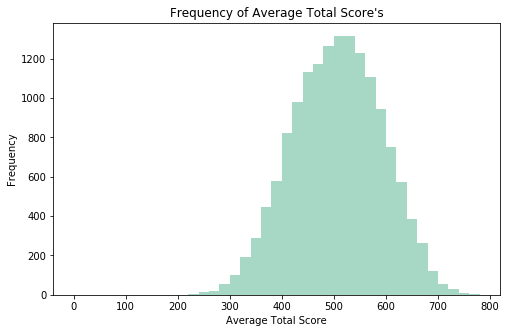

In [20]:
# Histogram of Average Total Score
binsize = 20
bins = np.arange(0, pisa['Average Total Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Total Score', bins = bins, color = color1)
plt.xlabel('Average Total Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Total Score\'s');

Here we can see that it is a very normal distribution. This is generally not surprising since bell curves are expected when it comes to the grades of students.

We can now move onto the three scores that the total score is comprised of: Math, Reading, and Science.

Text(0.5, 0, 'Average Math Score')

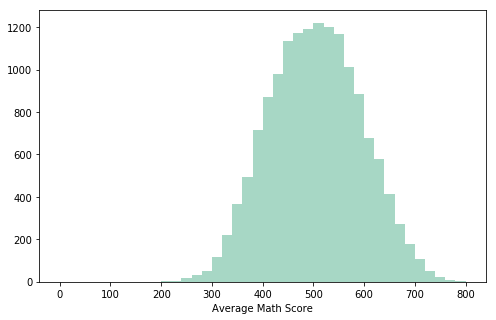

In [21]:
# Histogram of Average Math Score
binsize = 20
bins = np.arange(0, pisa['Average Math Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Math Score', bins=bins, color = color1)
plt.xlabel('Average Math Score')

We can easily say that this distribution is very much so like the total score in that it has a distinct normal distribution.

Text(0.5, 0, 'Average Reading Score')

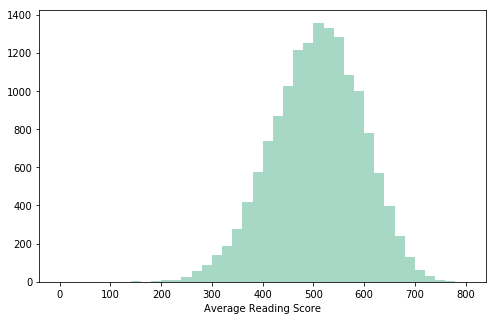

In [22]:
# Histogram of Average Reading Score
binsize = 20
bins = np.arange(0, pisa['Average Reading Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Reading Score', bins=bins, color = color1)
plt.xlabel('Average Reading Score')

Just as with the Math score, we can see the average Reading score is falling along a normal distribution.

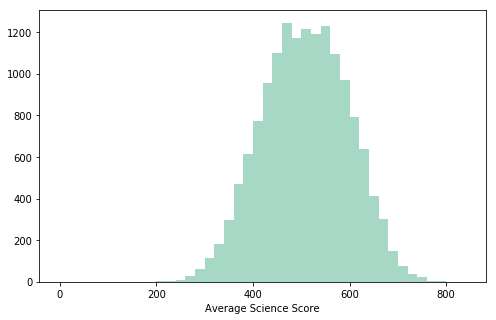

In [23]:
# Histogram of Average Science Score
binsize = 20
bins = np.arange(0, pisa['Average Science Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Science Score', bins=bins, color = color1)
plt.xlabel('Average Science Score');

Just as with the Total, Math, and Reading scores, we can see the Science score also falls along a normal distribution. 

We can now move onto the Study Time variables.

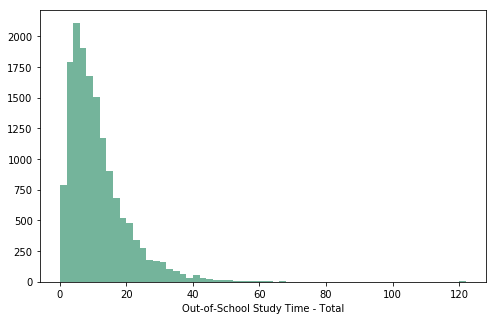

In [24]:
# Histogram of the Total Out-of-School Study Time
binsize = 2
bins = np.arange(0, pisa['Out-of-School Study Time - Total'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Total');

From this histogram for the Total Out-of-School Study Time, we can see a strong right skew on this unimodal distribution. Due to the tail that extends past the peak, we should look at this variable on a logarithmic scale.

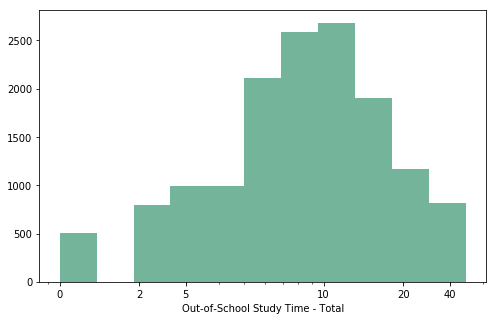

In [25]:
log_binsize = 0.2
bins = 5 ** np.arange(0, np.log10(pisa['Out-of-School Study Time - Total'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = color2, bins = bins)
plt.xscale('log')
plt.xticks([1e0, 2e0, 3e0, 1e1, 2e1, 3e1], [0, '2', '5', '10', '20', '40'])

plt.xlabel('Out-of-School Study Time - Total');

In [26]:
list(pisa)

['Country',
 'Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

The data for this distribution remains unimodal and quite consistent under a logarithmic scale.

Now we can look at each of the variables that have been used to create the Total Out-of-School Study Time: 'Out-of-School Study Time - Homework', 'Out-of-School Study Time - Guided Homework', 'Out-of-School Study Time - Personal Tutor', 'Out-of-School Study Time - Commercial Company', 'Out-of-School Study Time - With Parent'

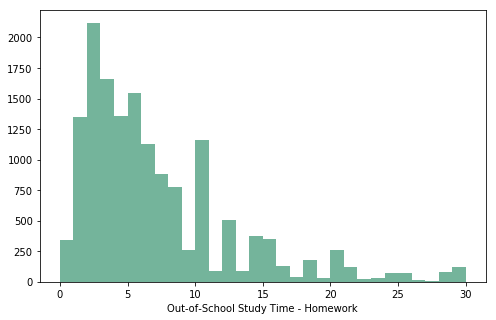

In [27]:
# Histogram of the Out-of-School Study Time for Homework
binsize = 1
bins = np.arange(0, pisa['Out-of-School Study Time - Homework'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Homework', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Homework');

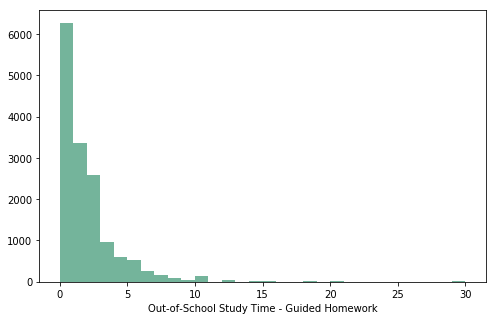

In [28]:
# Histogram of the Out-of-School Study Time for Guided Homework
binsize = 1
bins = np.arange(0, pisa['Out-of-School Study Time - Guided Homework'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Guided Homework', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Guided Homework');

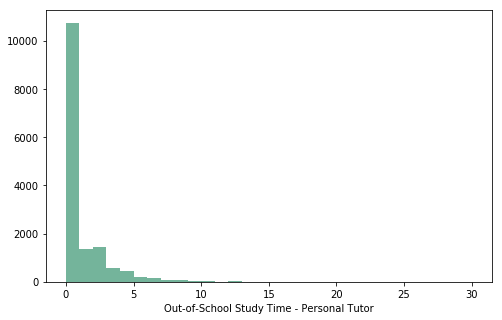

In [29]:
# Histogram of the Out-of-School Study Time with a Personal Tutor
binsize = 1
bins = np.arange(0, pisa['Out-of-School Study Time - Personal Tutor'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Personal Tutor', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Personal Tutor');

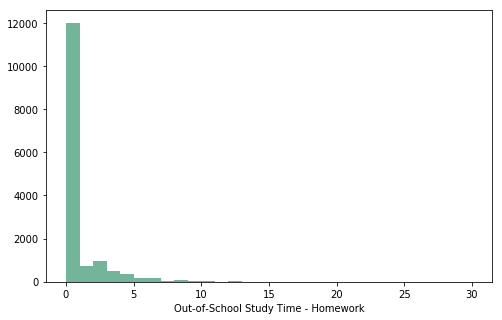

In [30]:
# Histogram of the Out-of-School Study Time with a Commercial Company
binsize = 1
bins = np.arange(0, pisa['Out-of-School Study Time - Commercial Company'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Commercial Company', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Homework');

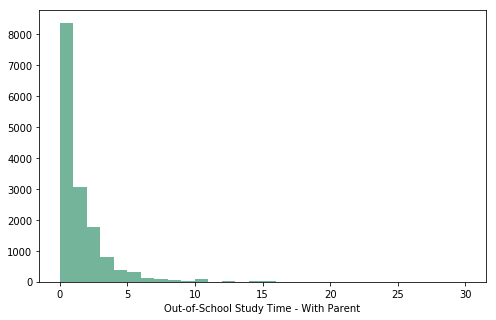

In [31]:
# Histogram of the Out-of-School Study Time with a Parent
binsize = 1
bins = np.arange(0, pisa['Out-of-School Study Time - With Parent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - With Parent', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - With Parent');

Each of the above histograms for Out-of-School Study Time reflected exactly what we saw in the Total Out-of-School Study Time histogram. They are all strongly left skewed unimodal distributions, which is not much of a surprise since students generally put in in some Study Time outside of school, but the amount of time a student can dedicate to studying drops thereafter.

Now we can move on to look at the Learning Time distributions.

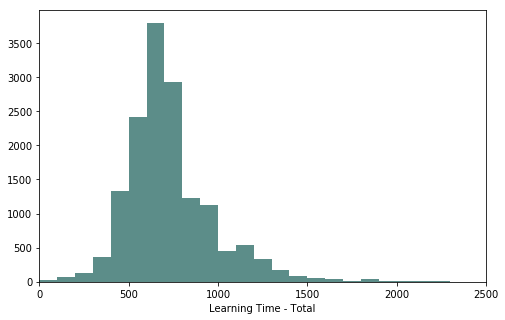

In [32]:
# Histogram of the Total Learning Time
binsize = 100
bins = np.arange(0, pisa['Learning Time - Total'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Total', color = color3, bins=bins)
plt.xlim(0, 2500)
plt.xlabel('Learning Time - Total');

Although slightly skewed to the right, this distribution is much more normal if we compare to the Out-of-School Study Time distribution. But to understand Learning Time, we must look into each of the subjects. 

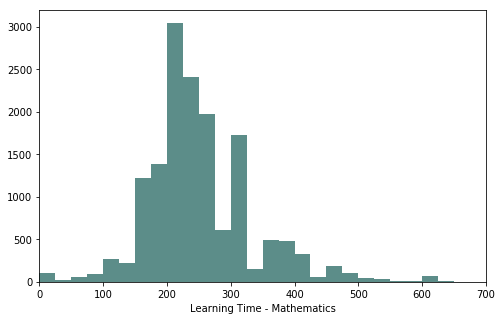

In [33]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Mathematics'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Mathematics', color = color3, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Mathematics');

This distribution for Mathematics related Learning Time generally matches the unimodal and normal distribution that we saw for the Total Learning Time, although it is more sporadic in nature.

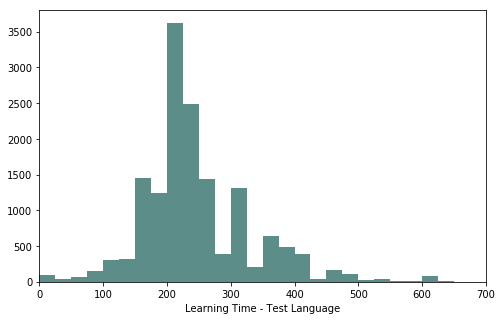

In [34]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Test Language'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Test Language', color = color3, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Test Language');

Once again, the distribution for Test Language reflect the same distributions that we saw for both Mathematics and the Total Learning Time.

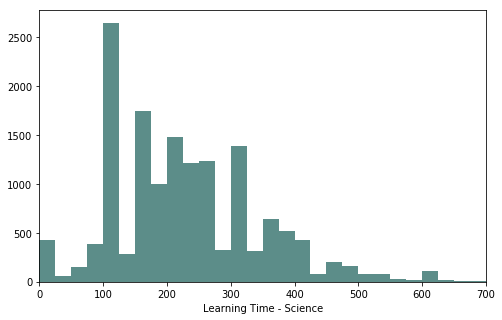

In [35]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Science'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Science', color = color3, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Science');

This distribution, on the other hand, shows a different story. For Science we can see a clear right skew. 

Since all of the Learning Time variables have values that are beyond 600 minutes, and these values might distort our later plots, we should analyze them and determine if it makes sense to disregard them.

In [36]:
# Select high outliers for the learning time total, using criteria eyeballed from the plot
high_outliers_math = (pisa['Learning Time - Mathematics'] > 600)

print(high_outliers_math.sum())
print(pisa.loc[high_outliers_math,:])

70
                        Country  Student ID  Gender  \
215                     Denmark        1626    Male   
486               Florida (USA)        1561    Male   
526                      Mexico       15126  Female   
1259                     Canada       14395  Female   
1813        Massachusetts (USA)        1435  Female   
1928                     Latvia        2110  Female   
1997                     Mexico       21587  Female   
2067                     Canada       17113    Male   
2622                     Mexico         554    Male   
3112                     Mexico       30815    Male   
3240       United Arab Emirates        7285    Male   
3714                     Canada       19278    Male   
3725       United Arab Emirates        6070  Female   
3757       United Arab Emirates        7660  Female   
4024                     Mexico       33486    Male   
4271                     Canada       17089    Male   
4294                     Canada         259    Male   
4557   

In [37]:
high_outliers_lang = (pisa['Learning Time - Test Language'] > 600)

print(high_outliers_lang.sum())
print(pisa.loc[high_outliers_lang,:])

62
                    Country  Student ID  Gender  \
215                 Denmark        1626    Male   
486           Florida (USA)        1561    Male   
1044   United Arab Emirates        7004  Female   
1259                 Canada       14395  Female   
1429                Denmark        7234  Female   
1732         United Kingdom       10803  Female   
1855    Massachusetts (USA)         587  Female   
1917                  Chile         167    Male   
1997                 Mexico       21587  Female   
2237   United Arab Emirates       10226    Male   
2622                 Mexico         554    Male   
3032                Denmark         784    Male   
3112                 Mexico       30815    Male   
3240   United Arab Emirates        7285    Male   
3642                 Mexico       32062    Male   
3714                 Canada       19278    Male   
4024                 Mexico       33486    Male   
4116                 Canada       12780    Male   
4271                 Canada 

In [38]:
high_outliers_sci = (pisa['Learning Time - Science'] > 600)

print(high_outliers_sci.sum())
print(pisa.loc[high_outliers_sci,:])

180
                    Country  Student ID  Gender  \
180                 Austria        2024    Male   
189    United Arab Emirates        6450    Male   
193       Connecticut (USA)         905  Female   
224                   Chile         462    Male   
265    United Arab Emirates        4439    Male   
269          China-Shanghai        5053    Male   
372                   Chile         234    Male   
486           Florida (USA)        1561    Male   
504    United Arab Emirates        2784  Female   
521    United Arab Emirates         523    Male   
528    United Arab Emirates         305  Female   
574    United Arab Emirates        1343    Male   
590                  Brazil       18569  Female   
606    United Arab Emirates        1200    Male   
665    United Arab Emirates        4740  Female   
718    United Arab Emirates        6230    Male   
1015                 Canada        3257  Female   
1225               Portugal        2432  Female   
1255               Thailand

Since the amount of outliers is so low and they do not bring exceptionally relevant information to the analysis, it will be better if we continue without them.

In [39]:
# Remove outliers
pisa = pisa.loc[-high_outliers_math & -high_outliers_lang & -high_outliers_sci,:]

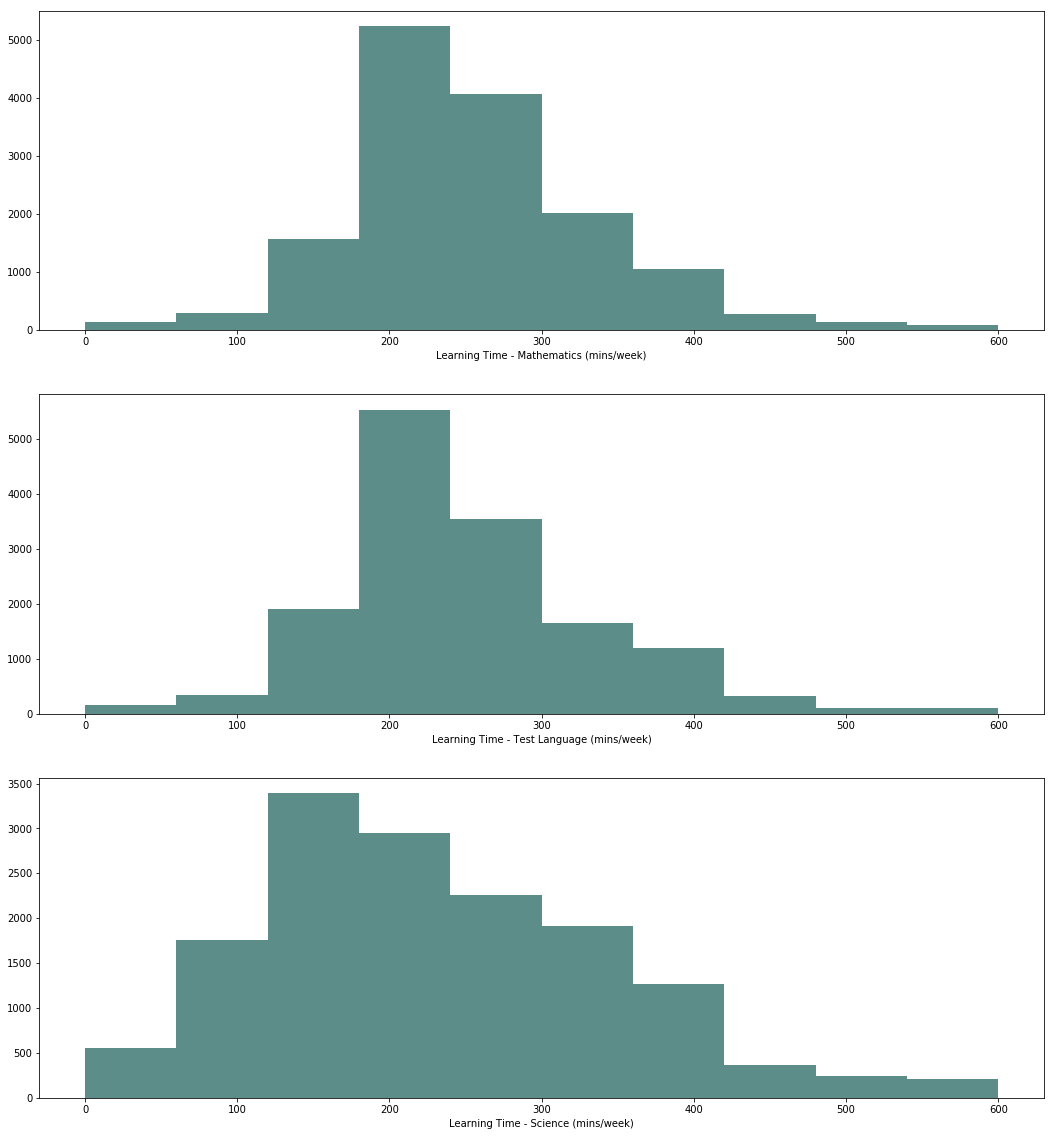

In [222]:
# Re-plotting the distributions of Learning Times
fig, ax = plt.subplots(nrows=3, figsize = [18,20])

variables = ['Learning Time - Mathematics', 'Learning Time - Test Language', 'Learning Time - Science']
for i in range(len(variables)):
    var = variables[i]
#     bins = np.arange(min(pisa[var]), max(pisa[var])+0.1, 0.1)
    ax[i].hist(data = pisa, x = var, color=color3)
    ax[i].set_xlabel('{} (mins/week)'.format(var))

plt.show()

Last but not least, we still have the parental education levels to analyze.

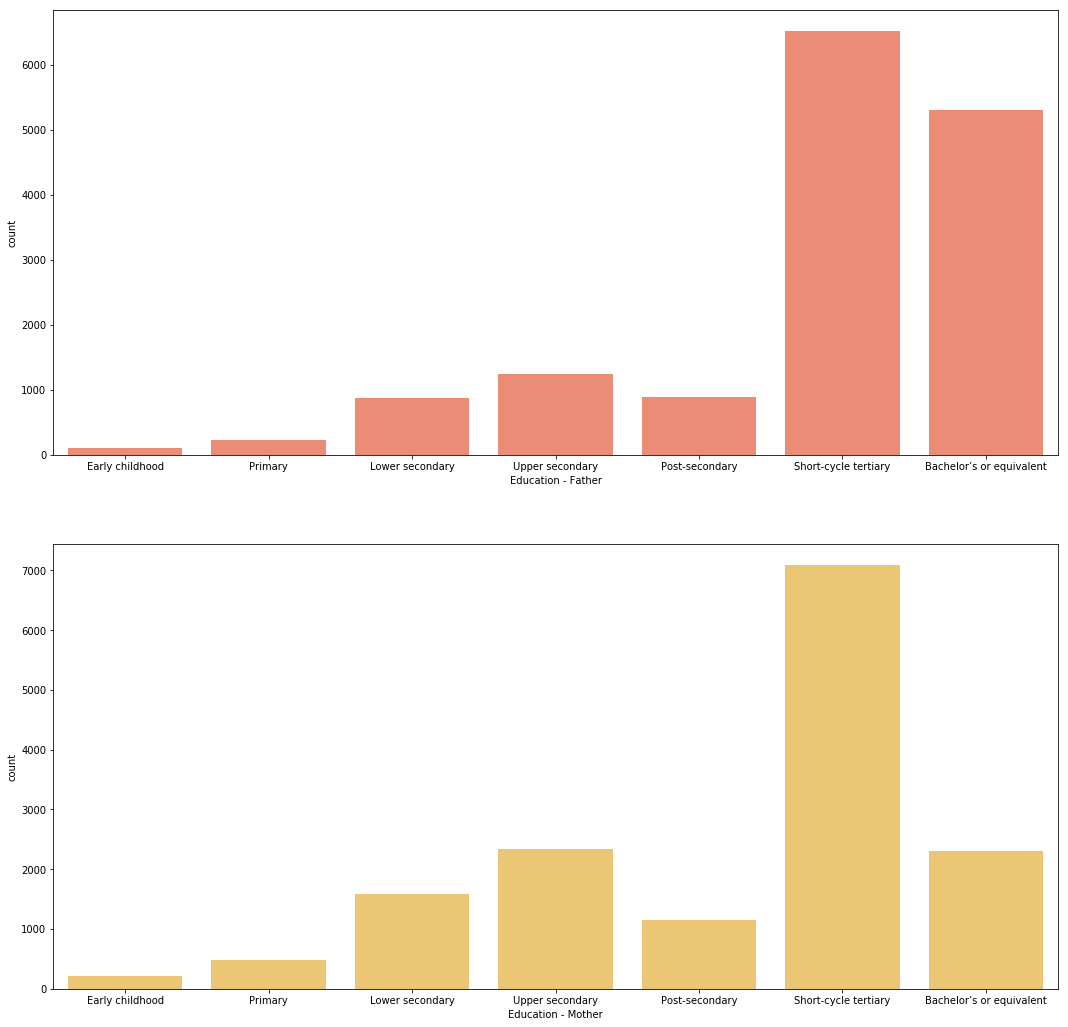

In [26]:
# The ordinal variable's distribution for both Mother's and Father's Education 
fig, ax = plt.subplots(nrows=2, figsize = [18,18])

default_color = sb.color_palette()[0]
sb.countplot(data = pisa, x = 'Education - Father', color = color_male, ax = ax[0])
sb.countplot(data = pisa, x = 'Education - Mother', color = color_female, ax = ax[1])

plt.show()

Here it shows that the students that exist in this dataset typically have parents of higher educational levels. Short-cycle Tertiary education takes a clear majority for both mother and father, while parents with just Early Childhood education have the lowest amount of children in this dataset. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For 'Average Total Score', the distribution was strikingly normal. However, this was expected to an extent, since student grades typically fall along a bell curve. As a result, no unusual points stood out for this variable, nor did any stand out for the three scores that resulted in the total score. Therefore, no transformations were necessary to make sense of the data. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The secondary features investigated were Study Times, Learning Times, and Parental Education. 

For Study Times, the total had a strong right skew, as did the rest of the Study Times that the total was composed of. To better understand this feature, we spread the total across a logarithmic scale to see if it was not in fact unimodal or to see any other irregularities. In the end, it ended up being unimodal and quite normal. 

As for the Learning Time, this data clearly had outliers, so for each of the Learning Time's, the outliers over 600 minutes were excluded. This was done to look at the more typical student results, and so that later plots will not be distorted by these exceptionally dedicated students. 

And the Parents Education variables have a bit too much weight on parents with higher educational levels, but considering the plots we will run, this should not have a great impact so we will leave it as is.

## Bivariate Exploration


### Out-of-School Study Time and Learning Time

To start off, let's look at the correlations between each of the Scores, the Total Out-of-School Study Time, and the Total Learning Time to see if the amount of time dedicated to a subject has an influence on the score, and how strongly the Scores are correlated with one another.

In [181]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Total Score', 'Out-of-School Study Time - Total', 'Learning Time - Total']

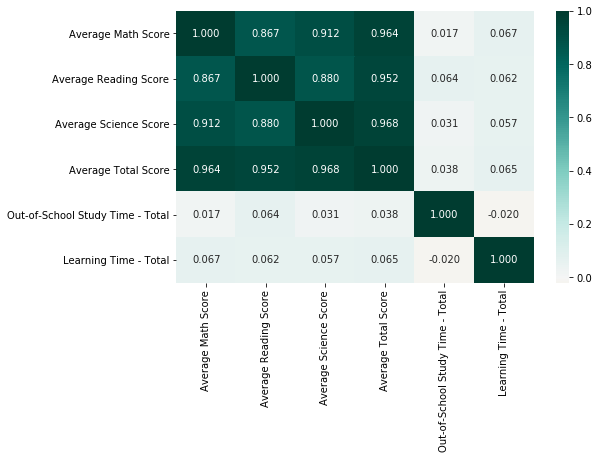

In [208]:
# Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

Considering the correlations between the Scores, the Total Out-of-School Study Time and Total Learning Time, we can see that the Total Learning Time is slightly better correlated with the scores than the Total Out-of-School Study Time, with the Average Reading Score being the exception.

To better understand the relationship between the Scores and the Learning Time, lets look at the breakdown of each of the Learning Time per subject.

In [223]:
score_learn_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Learning Time - Mathematics',
                'Learning Time - Test Language', 'Learning Time - Science', 
                'Learning Time - Total']


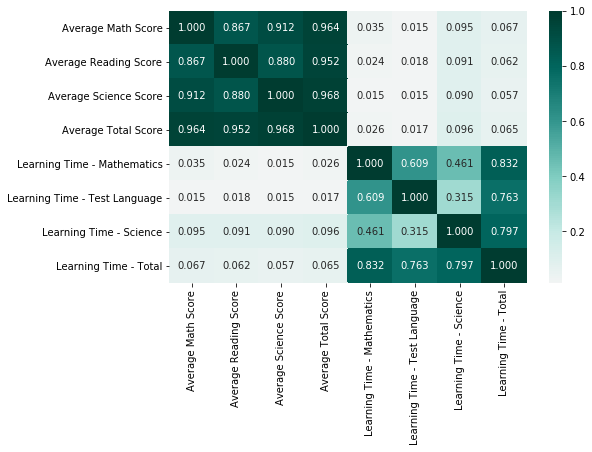

In [224]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_learn_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

Interestingly, we can see that the Learning Time for Mathematics and the Test Language have no correlation at all with any of the Scores when compared to the Learning Time for Science. 

We can look at these variables now through another perspective: seeing the scatter plot relationships between them.

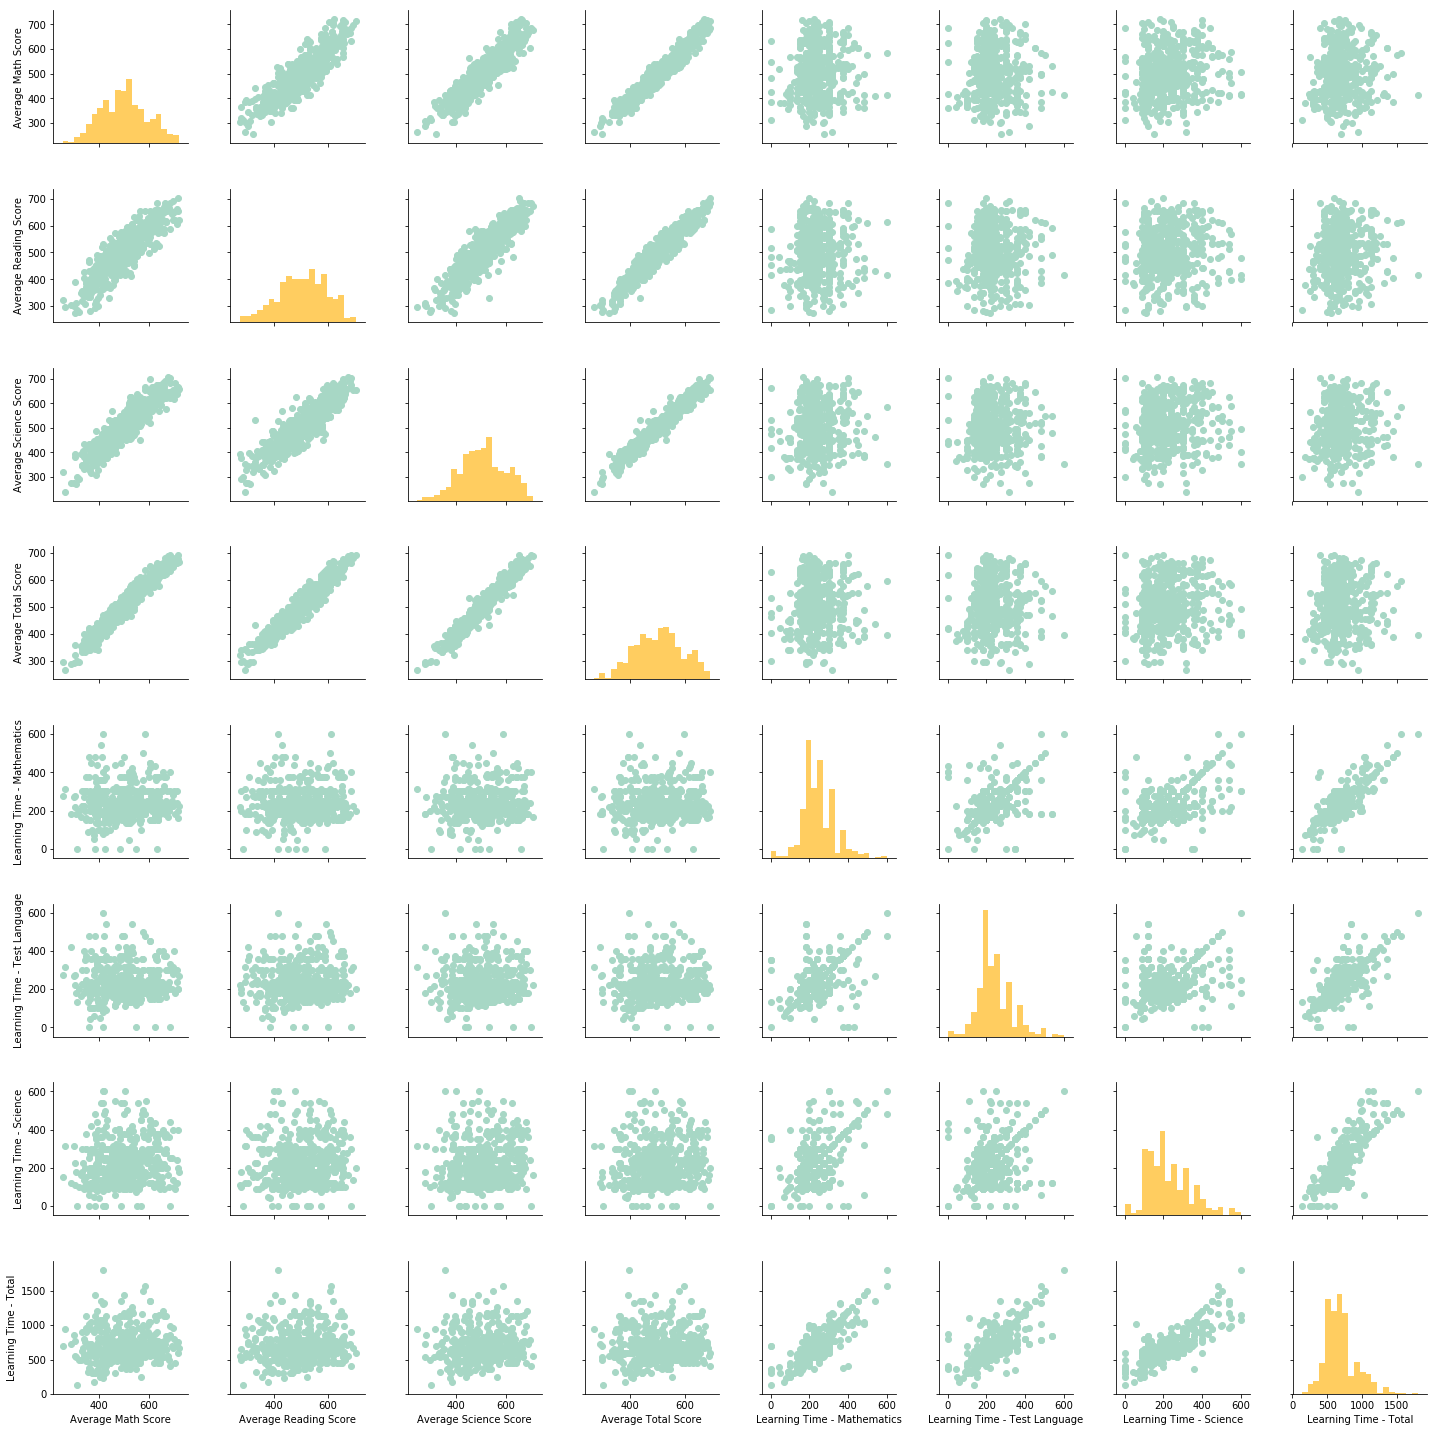

In [234]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = score_learn_vars)
g = g.map_diag(plt.hist, bins = 20, color='#ffcd60');
g.map_offdiag(plt.scatter, color = color1);

As expected, we can clearly see a strong positive correlation between each of the Scores. As for the relationships between the Learning Times, a positive relationship is visual between each of them, albeit not very strong with the exception of some outliers.

When it comes to the relationship between the Scores and Learning Times, we can see that the amount of time a study spends learning a topic has no relationship with the Score that they will receive according to this plot. 

In [226]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent', 
                      'Out-of-School Study Time - Total']

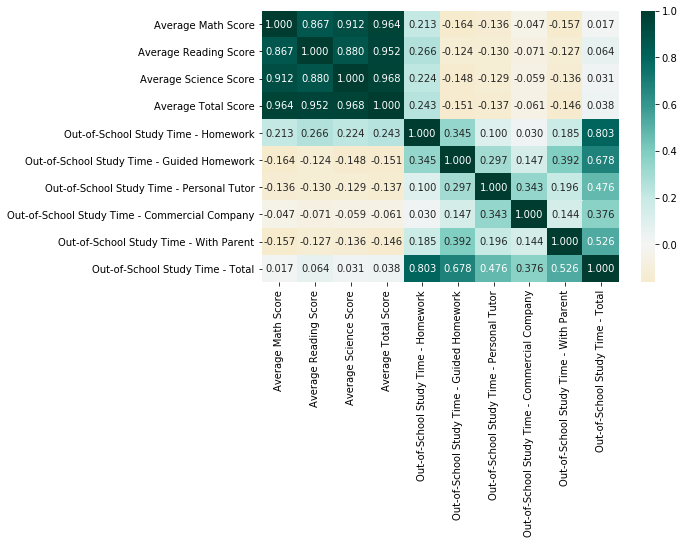

In [228]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_study_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

The results of this correlation plot are noteworthy in that it indicates that study time in terms of Guided Homework, with Personal Tutor, with a Commercial Company, and with a Parent have no positive influence on the score of a student. This could be related to the fact that the students who do need this amount of help are already the ones who struggle with grades, but since we have no information on previous Scores of said students, we cannot explore this theory any further for now. 

We can however, look deeper into the role of Homework in the students Score.

In [231]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Out-of-School Study Time - Homework']

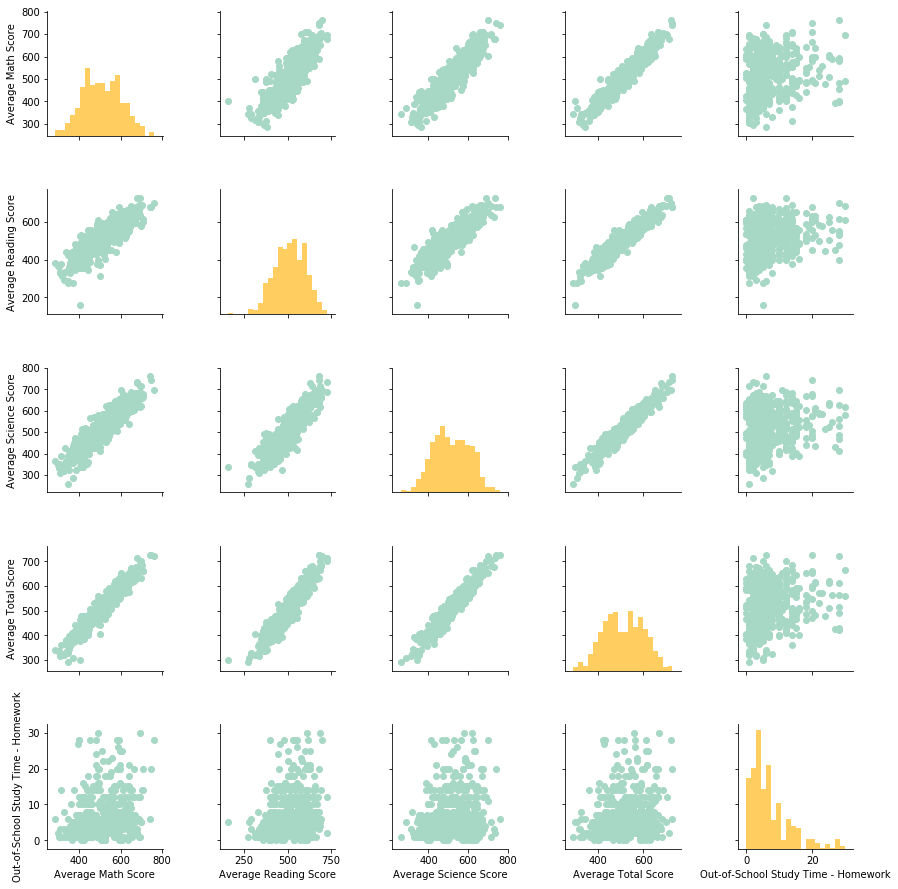

In [235]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = score_study_vars)
g = g.map_diag(plt.hist, bins = 20, color='#ffcd60');
g.map_offdiag(plt.scatter, color = color1);

Although the relationship between Homework Study Time and all the various Scores is weak, we can see that the more time a student spends on Homework, the higher their Score is. But this relationship only really exists until the Score is about 450. So for the students who are at the bottom of the Scoring rank spend time doing Homework, then they can move into the average Scores. As for the higher Scores, seems like they are generally unaffected.

Lastly, let's look at the relationship between the Study Time and Learning Time variables to see if they strongly with one another in any interesting way. 

In [212]:
time_vars = ['Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent',
                      'Learning Time - Mathematics',
                      'Learning Time - Test Language',
                      'Learning Time - Science']

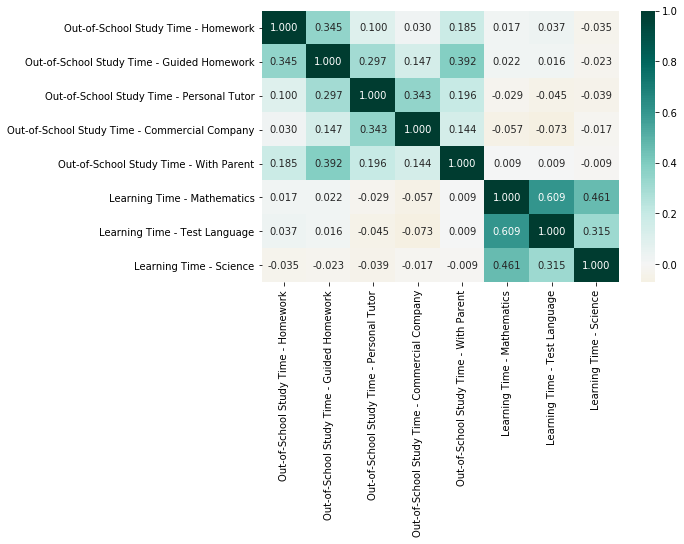

In [213]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[time_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

When it comes to the Study Times and Learning Times, no relationship is visible, and they barely have any relationships with the categories themselves. So, we cannot say that certain students study within school and outside of school more than others. In general for this section, we cannot see much of an influence from Time spent learning on Scores. 

Now we can see our next set of factors that might influence the Score of a student: 

### Parental Education and Gender

To start off, let's look at the distribution of each level of education and the frequency of each.

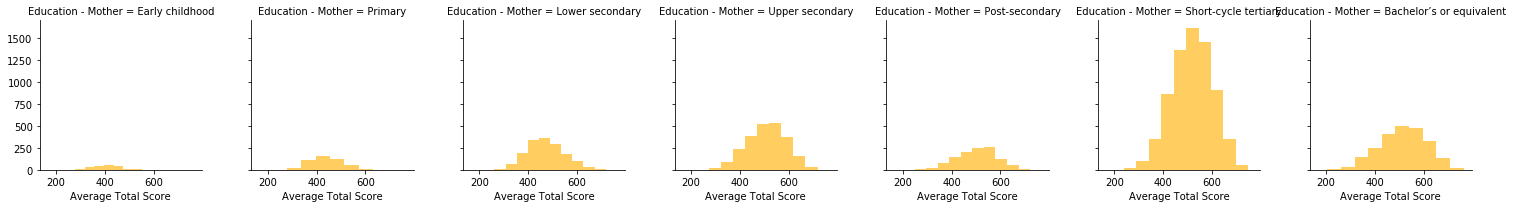

In [34]:
g = sb.FacetGrid(data = pisa, col = 'Education - Mother');
g.map(plt.hist, 'Average Total Score', color = color_female);

Here we can see that the children in this dataset frequently have mothers with a Short-cycle Tertiary Education. In terms of Scores for each level, children with mothers who have just Early Childhood education perform much worse, with distribution that does not even reach the Score of 600. Meanwhile, the highest level of Bachelor's or equivalent is slightly left skewed and goes past the 600 mark.

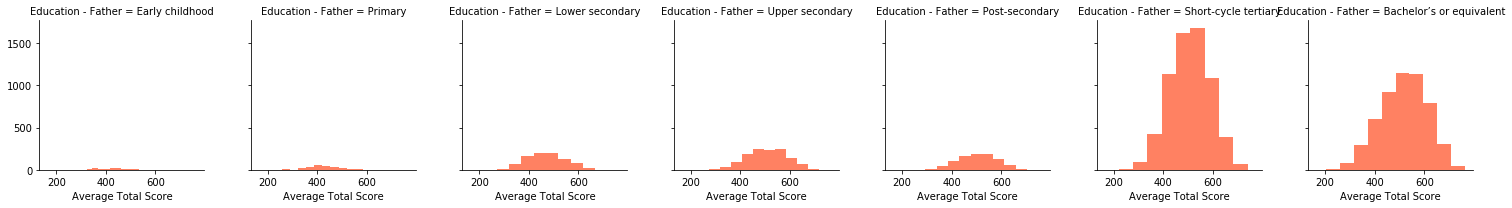

In [35]:
g = sb.FacetGrid(data = pisa, col = 'Education - Father');
g.map(plt.hist, 'Average Total Score', color = color_male);

The same can be said for the education levels for the fathers. Except here we have more fathers with Bachelor's or equivalent educations.

Next we can look at the distribution for each of these levels to see the range and medians better.

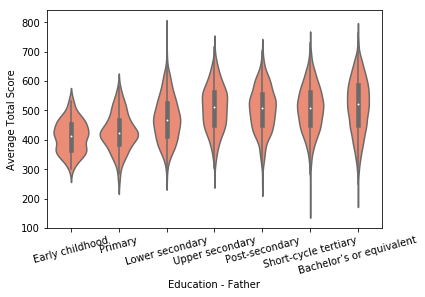

In [48]:
sb.violinplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = color_male);
plt.xticks(rotation = 15);

Interestingly, the spread is quite large for the children of higher educated fathers. In fact, it appears that the child who performed worst had a father with Short-cycle Tertiary education. Meanwhile, the children with parents who have only Early Childhood education seem to have a much smaller range and exist to a much greater extent around the median. 

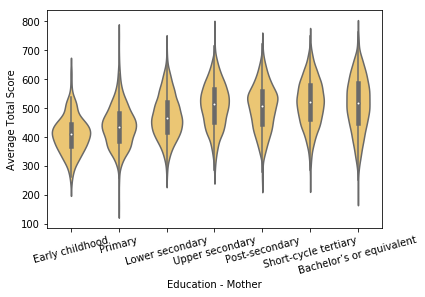

In [49]:
sb.violinplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score', 
              color = color_female);
plt.xticks(rotation = 15);

The violin plot for the Mother's Education is more along the lines of what we expect, with the median growing from one level to the next, and each of which has a reasonable spread. 

But to see the extent to which the outliers play a role, we can look at the same data with box plots.

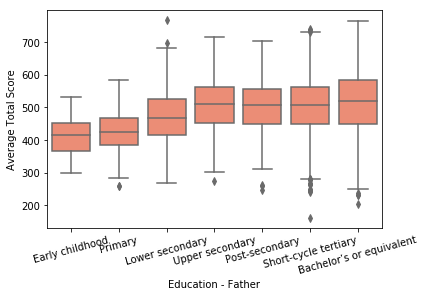

In [52]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = color_male);
plt.xticks(rotation = 15);

Once again we can see the student who performs lowest overall is an outlier for the Short-cycle Tertiary level, and in general the same trend exists. 

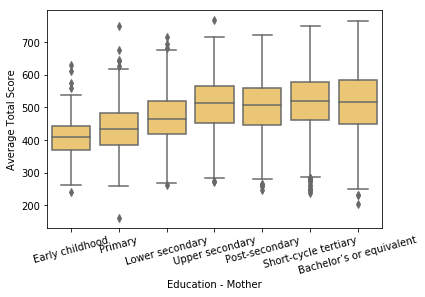

In [85]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = color_female);
plt.xticks(rotation = 15);

Here we can see that for the lower education levels for the mother, the students are generally achieving lower grades, but there are a good amount of high score outliers. While on the other half of the educational levels, there is a tendency for high grades with a few low score outliers.

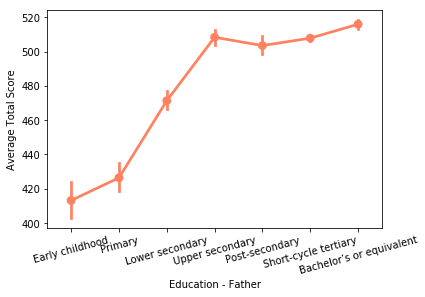

In [44]:
sb.pointplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
             color = color_male);
plt.xticks(rotation = 15);

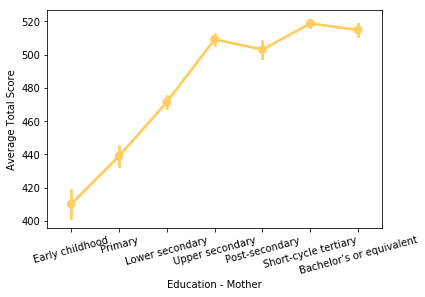

In [45]:
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = '#ffcd60');
plt.xticks(rotation = 15);

In general, we can see that the student Scores grow with the education level of the parent, regardless of the gender of the parent, until a point where it seems to plateau. 

Now we can move towards looking at the gender of the child as well.

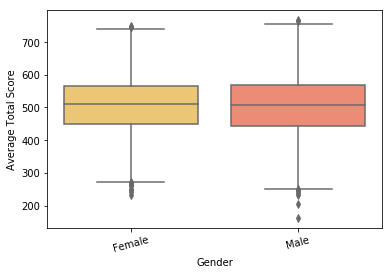

In [46]:
sb.boxplot(data = pisa, 
              x = 'Gender', 
              y = 'Average Total Score',
              palette = color_gends);
plt.xticks(rotation = 15);

If we look at the role that Gender plays on the Score, the range seems to match. However, the males seem to dip lower with their outliers. 

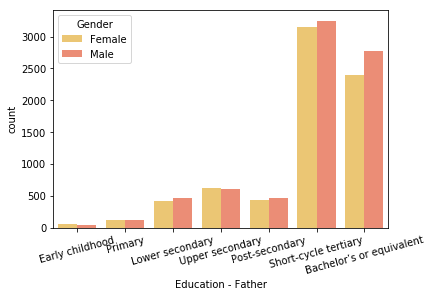

In [47]:
sb.countplot(data = pisa, x = 'Education - Father', hue = 'Gender', palette = color_gends)
plt.xticks(rotation = 15);

Here we can see how many female and male children have parents that fall into the educational levels. It's generally about the same, except for Bachelor's or equivalent, where there are many more males than females.

Now we can look at whether gender plays a role in the Score of a student.

In [48]:
# Create a subset to better see comparison plots
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


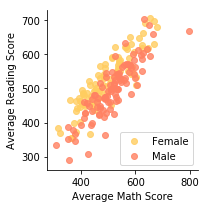

In [53]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends)
g.map(sb.regplot, 'Average Math Score', 'Average Reading Score', fit_reg = False)
plt.legend();

Here we can see that females have a tendency for higher Reading Scores, and males have a tendency for higher Math Scores.

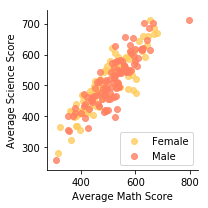

In [54]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends)
g.map(sb.regplot, 'Average Math Score', 'Average Science Score', fit_reg = False)
plt.legend();

The same separation cannot be made when comparing Math to Science for male and female. They seem to overlap completely.

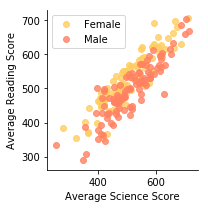

In [55]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends)
g.map(sb.regplot, 'Average Science Score', 'Average Reading Score', fit_reg = False)
plt.legend();

Once again, females outperform a bit when it comes to males and the Reading Score. 

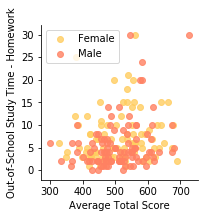

In [56]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Homework', fit_reg = False)
plt.legend();

When it comes to the one Out-of-School Study Time variable that had any noteworthy correlation from before, the Homework variable here has a negligible relationship to Score, as well as Gender.

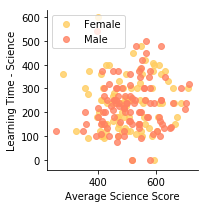

In [58]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends)
g.map(sb.regplot, 'Average Science Score', 'Learning Time - Science', fit_reg = False)
plt.legend();

As with the Out-of-School Study Time variable, we can look at the Science Score vs. the Science Score here since it was the strongest relationship. Once again, the effect of Gender is not visible.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section it became visible that the Scores were less influenced by Out-of-School Study Time and Learning Time than expected. They were however strongly associated to the Educational level of the parents. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly enough, Out-of-School Study Time and Learning Time were not as significant as I had expected. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

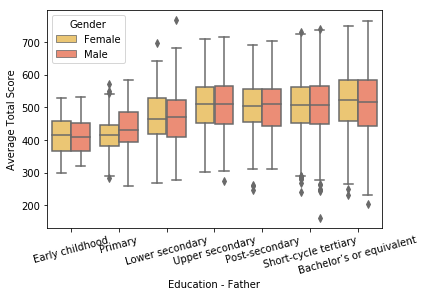

In [89]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              hue = 'Gender',
              palette = color_gends);
plt.xticks(rotation = 15);

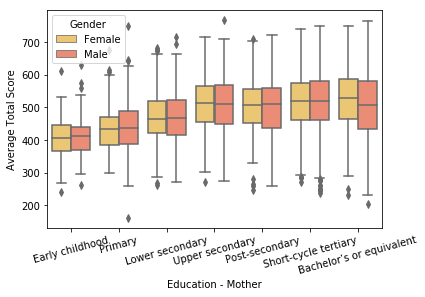

In [90]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              hue = 'Gender',
              palette = color_gends);
plt.xticks(rotation = 15);

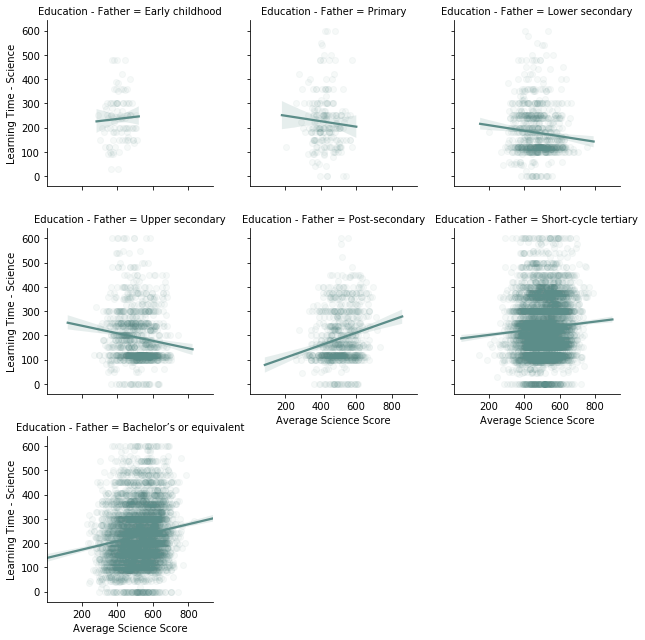

In [109]:
# Faceted scatter plots on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Science Score', 'Learning Time - Science', color = color3,  x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

Previously, we saw that the amount of Learning Time for Science looked promising when it came to its correlation to its corresponding Score, the Average Science Score, at least in comparison to the other pairs. However, when we look at the regression plots we see here, we can see there might be a separation between the students. The line of regression appears to be showing a negative correlation between Learning Time for Science and the Average Science Score for the students whose Fathers achieved Primary, Lower secondary, and Upper secondary education. On the other hand, with the 3 highest levels of education in our dataframe, Post-secondary, Short-cycle tertiary, and Bachelor's or equivalent, we can see a positive correlation. This might indicate that the higher the education of the father, the more likely that Science related Learning Time in school will produce a higher grade.

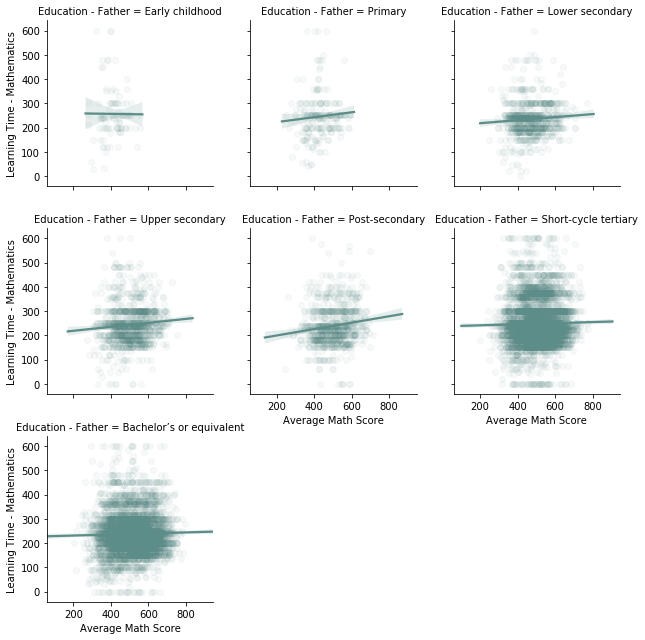

In [120]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Math Score', 'Learning Time - Mathematics', color = color3, x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

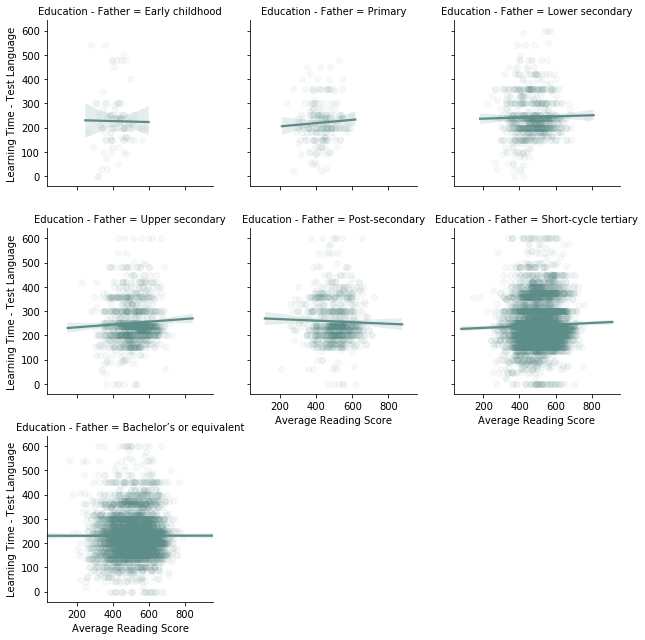

In [107]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Reading Score', 'Learning Time - Test Language', color = color3, x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

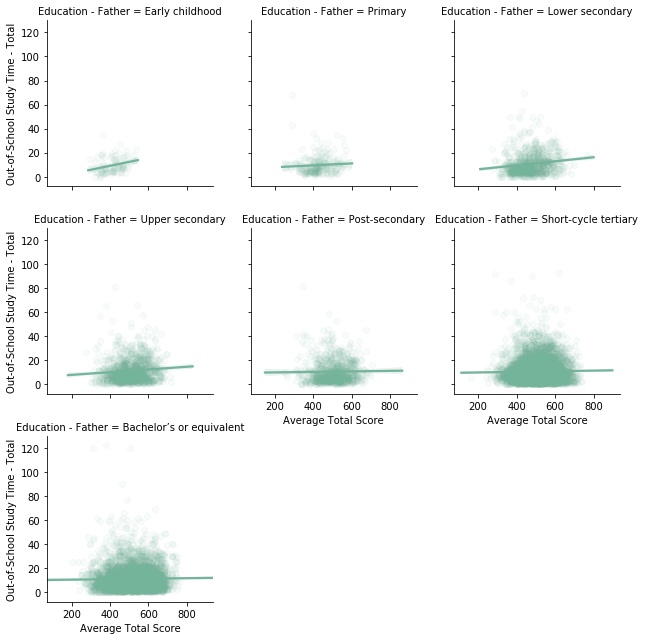

In [105]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Total', 
      color = color2, 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

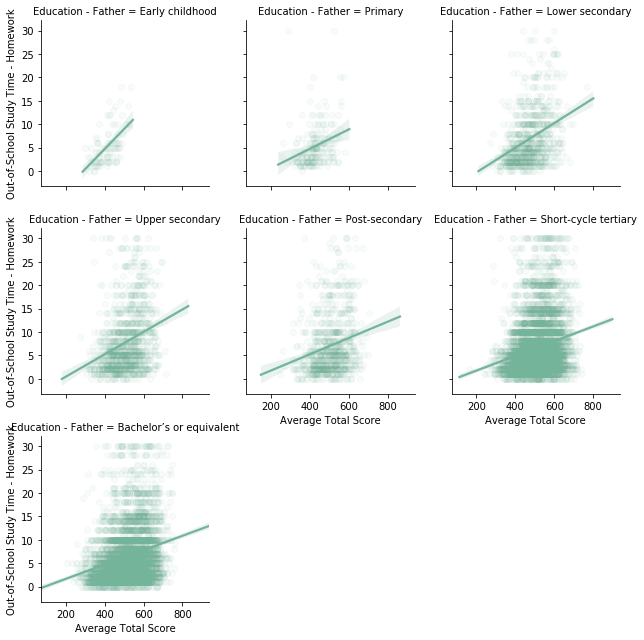

In [110]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Homework', color = color2,
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

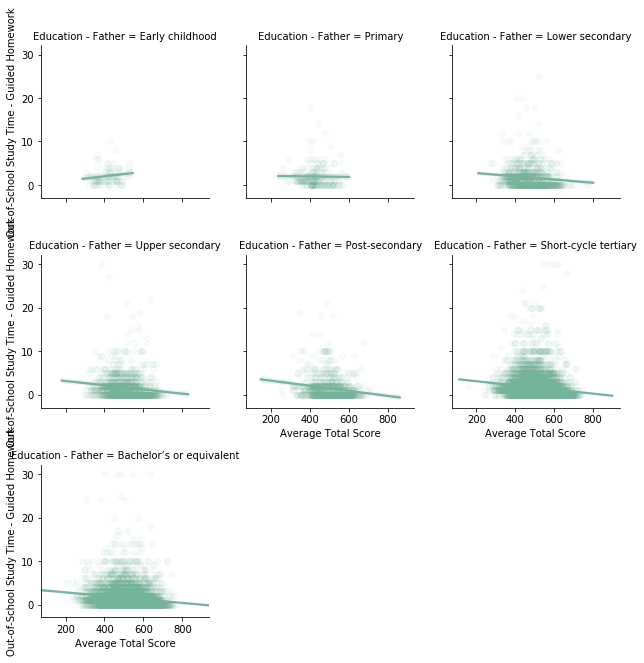

In [111]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Guided Homework', color = color2,
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

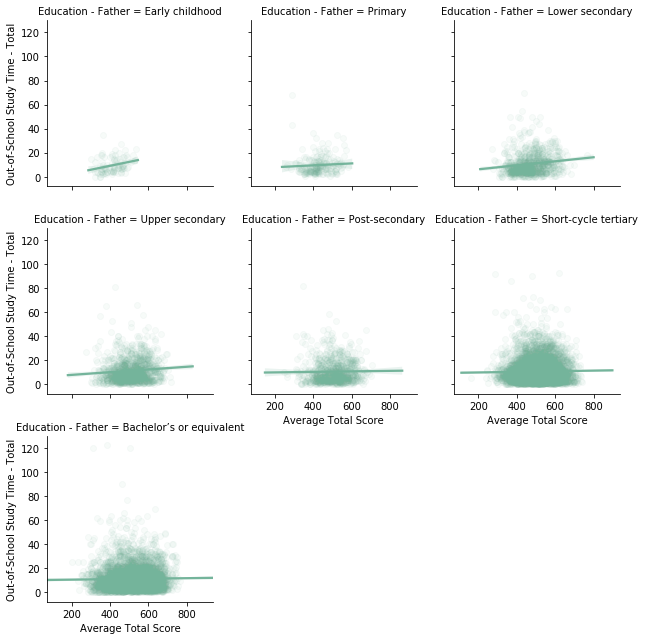

In [112]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 3, size = 3)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Total', color = color2,
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20})
# g.set_xlabels('Carat')
# g.set_ylabels('Price ($)')

plt.show()

In [69]:
scores = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score']

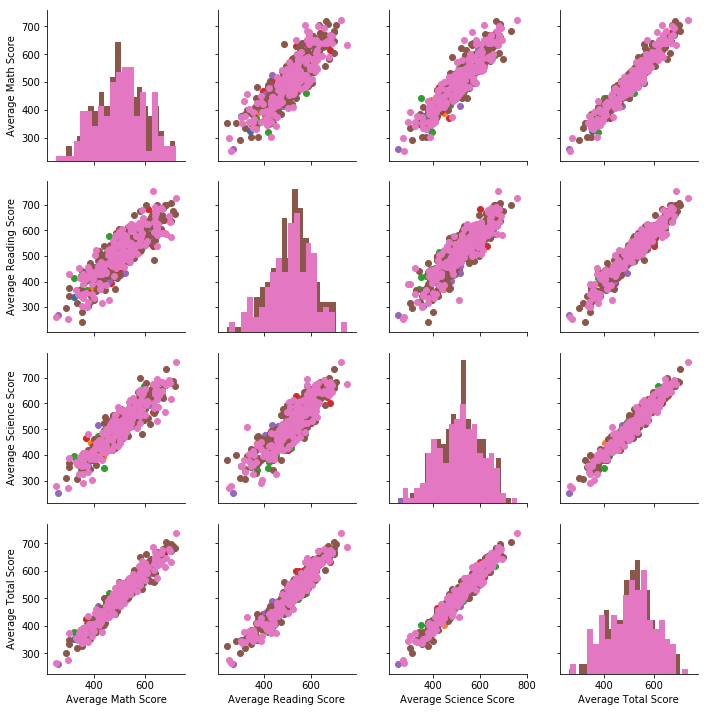

In [70]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = scores, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [91]:
study_time = ['Out-of-School Study Time - Homework', 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor','Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent']

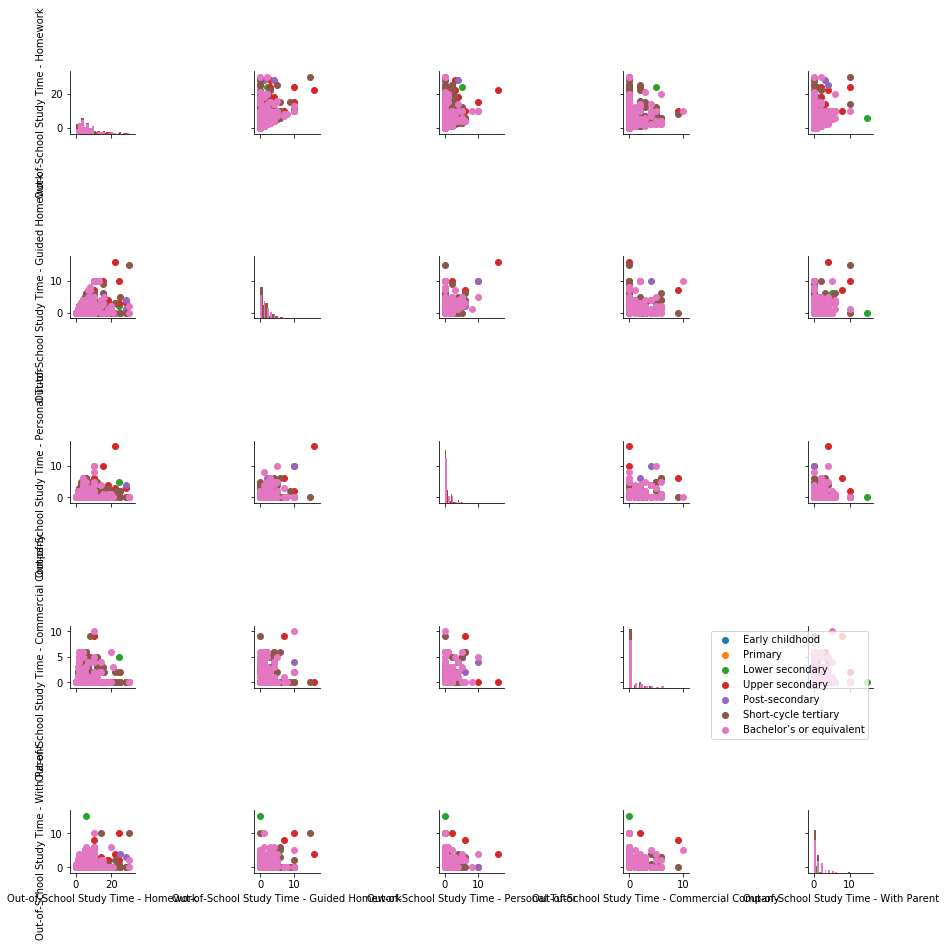

In [93]:
g = sb.PairGrid(data = pisa_samp, vars = study_time, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.legend();

In [94]:
learning_time = ['Learning Time - Mathematics', 'Learning Time - Test Language', 'Learning Time - Science']

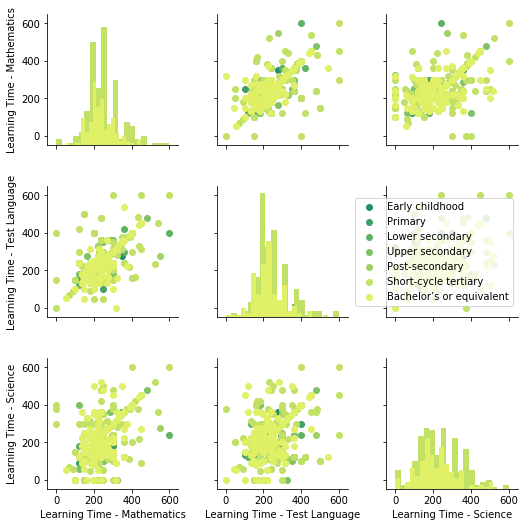

In [250]:
g = sb.PairGrid(data = pisa_samp, vars = learning_time, hue='Education - Father', palette = 'summer')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.legend();

In [72]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

In [77]:
# https://python-graph-gallery.com/122-multiple-lines-chart/
# plt.plot('Out-of-School Study Time - Total', 'Average Total Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Math Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Reading Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Science Score', data=pisa )

# plt.legend()

In [78]:
# carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]

In [79]:
# compute the logarithm of Average Total Score to make multivariate plotting easier
# def log_trans(x, inverse = False):
#     """ quick function for computing log and power operations """
#     if not inverse:
#         return np.log10(x)
#     else:
#         return np.power(10, x)
    
# # compute the cuberoot of Out-of-School Study Time - Total to make multivariate plotting easier
# def cuberoot_trans(x, inverse = False):
#     """ quick function for computing cube root and cube operations """
#     if not inverse:
#         return x ** (1/3)
#     else:
#         return x ** 3
    
    
# pisa['log_score'] = pisa['Average Total Score'].apply(log_trans)
# pisa['cr_time'] = pisa['Out-of-School Study Time - Total'].apply(cuberoot_trans)

In [80]:
# pisa_countries.head()

NameError: name 'pisa_countries' is not defined

In [ ]:
# pisa_cnt = pisa_countries.copy()

In [ ]:
# pisa_cnt = pisa_cnt.reset_index()

In [ ]:
# pisa_cnt.head()

In [82]:
# sb.regplot(data= pisa_cnt, x = 'Out-of-School Study Time - Total', 
#            y = 'Average Total Score', 
#            fit_reg = False)
# plt.xlabel('Out-of-School Study Time - Total')
# plt.ylabel('Learning time (minutes per week) - Total');

NameError: name 'pisa_cnt' is not defined

In [ ]:
# sb.pointplot(data = pisa, 
#               x = 'Out-of-School Study Time - Total', 
#               y = 'Average Total Score');
# plt.xticks(rotation = 15);

In [ ]:
pisa.head()

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


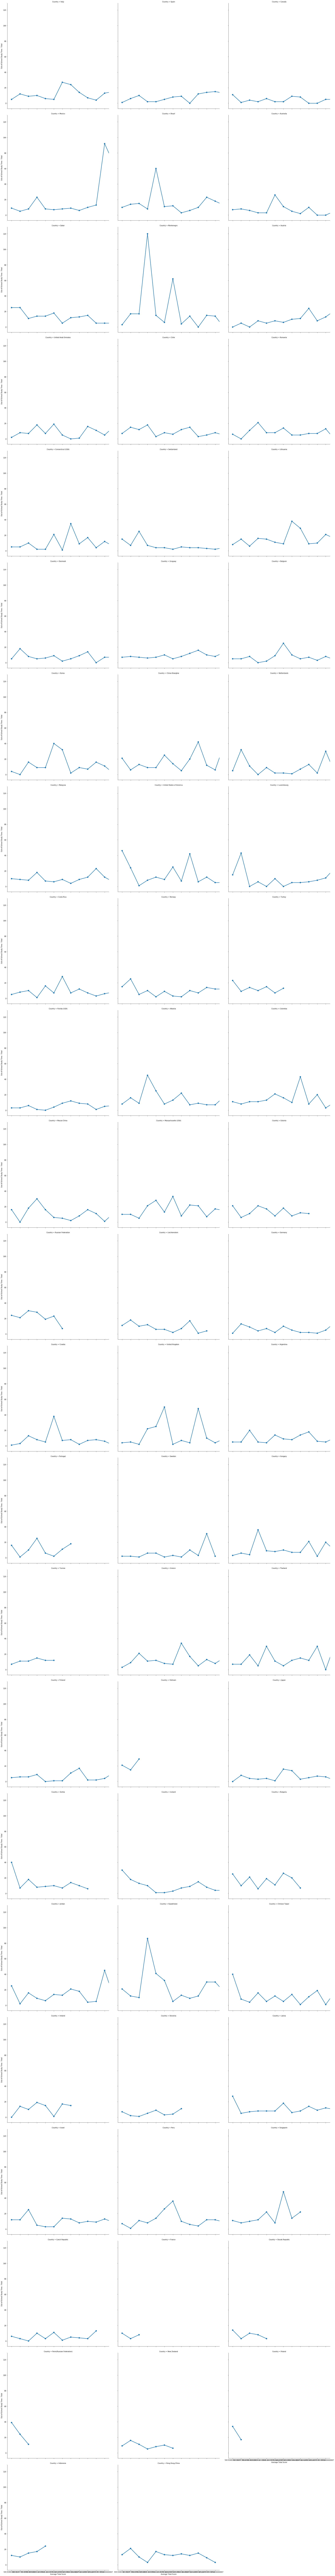

In [81]:
############
g = sb.FacetGrid(pisa, col='Country', col_wrap=3, height=10)
g = g.map(sb.pointplot, 'Average Total Score', 'Out-of-School Study Time - Total')

In [ ]:
pisa_countries = pisa.groupby('Country').mean()
pisa_countries = pisa_countries.reset_index(name = 'Country')
pisa_countries = pisa_countries.pivot(index = 'Country', columns = 'Average Total Score', values = 'count')

In [ ]:
pisa_countries

In [ ]:
g = sb.FacetGrid(pisa, col="Country", col_wrap=3, height=10)
g = g.map(plt.plot, 'log_score', 'cr_time')


# sb.heatmap(ct_counts, annot = True, fmt = 'd');
# fmt makes them into decimal values aka readable

In [ ]:
# for each country, average score and time studied

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!